In [3]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [4]:
import pandas as pd

desc_label = pd.read_json('/content/drive/MyDrive/정비메모분석/data/desc_labeled.json')    # 'new_inspect_type_cleanse'칼럼의 dtype은 list

# desc_label

In [5]:
desc_label.dropna(subset=['new_inspect_type_cleanse'], inplace=True)

In [ ]:
df_label = desc_label[['labeled', 'new_inspect_type_cleanse']]
# df_label

In [7]:
labels = df_label['new_inspect_type_cleanse']
type(labels[0])

list

In [8]:
type(labels[0][0])

list

In [9]:
len(labels[0])    # 0번째 description에 대하여 최종 재정의된 카테고리 개수 --> pre_desc에서 [SEP]으로 분리한 토큰의 개수와 다를 수 있는 점 유의!!

2

In [10]:
labels

0                          [[배선, 수리], [도어, 탈부착]]
13                                     [[디스크교환]]
19                                       [[전패드]]
24                                        [[탁송]]
29                                       [[요소수]]
                          ...                   
99146    [[후방카메라], [후방카메라 작동불가], [정상], [VOC 요청]]
99158                   [[하이패스], [하이패스카드, 확인완료]]
99162                             [[브레이크, 전구교환]]
99167                                 [[VOC 요청]]
99176                 [[후방카메라], [후방카메라], [수리요청]]
Name: new_inspect_type_cleanse, Length: 11462, dtype: object

In [11]:
print(','.join(labels[0][0]))

배선,수리


In [12]:
pre_desc = df_label['labeled']
type(pre_desc[0])

list

In [13]:
print(pre_desc[0])

['CM 배선 수리', '도어 액츄레이터 탈부착']


In [14]:
desc_label_list = []   # 추후에 dataframe으로 변환할 이중리스트

for i, row in df_label.iterrows():
  tokens = row['labeled']
  labels = row['new_inspect_type_cleanse']    # 이중리스트

  # token개수와 재정의 카테고리개수가 같은 경우 (1대1매핑)
  if len(tokens) == len(labels):
    for i in range(len(tokens)):
      temp = []    # desc_label_list에 append할 1차원 리스트
      temp.append(tokens[i].strip())
      temp.append(','.join(labels[i]))
      desc_label_list.append(temp)
  
  # 개수가 다른 경우, 재정의 카테고리 수가 어떤 token에 해당하는지 확인해야 함. (추출한 카테고리이므로 token에 포함여부를 확인해보면 된다.)
  else:
    for label_list in labels:    
      temp_tokens = []
      for label in label_list:    # label은 1개 이상
        for token in tokens:
          if label in token:
            temp_tokens.append(token)
      
      # print(label_list)
      # print(temp_tokens)
      for i in range(len(temp_tokens)):
        temp = []
        temp.append(temp_tokens[i].strip())
        temp.append(','.join(label_list))
        desc_label_list.append(temp)


  
# print(desc_label_list)

In [15]:
len(desc_label_list)

18743

In [16]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [17]:
result = pd.DataFrame(desc_label_list, columns = ["desc_token", "label"])
# result

In [18]:
# result.to_json('/content/drive/MyDrive/정비메모분석/data/desc_token_labeled.json')

여러개의 label중 가장 앞에 있는 label만 저장

In [19]:
desc_label_list2 = []   # 추후에 dataframe으로 변환할 이중리스트

for i, row in df_label.iterrows():
  tokens = row['labeled']
  labels = row['new_inspect_type_cleanse']    # 이중리스트

  # token개수와 재정의 카테고리개수가 같은 경우 (1대1매핑)
  if len(tokens) == len(labels):
    for i in range(len(tokens)):
      temp = []    # desc_label_list에 append할 1차원 리스트
      temp.append(tokens[i].strip())
      temp.append(labels[i][0])
      desc_label_list2.append(temp)
  
  # 개수가 다른 경우, 재정의 카테고리 수가 어떤 token에 해당하는지 확인해야 함. (추출한 카테고리이므로 token에 포함여부를 확인해보면 된다.)
  else:
    for label_list in labels:    
      temp_tokens = []
      for label in label_list:    # label은 1개 이상
        for token in tokens:
          if label in token:
            temp_tokens.append(token)
      
      # print(label_list)
      # print(temp_tokens)
      for i in range(len(temp_tokens)):
        temp = []
        temp.append(temp_tokens[i].strip())
        temp.append(label_list[0])
        desc_label_list2.append(temp)


# print(desc_label_list2)

In [20]:
result2 = pd.DataFrame(desc_label_list2, columns = ["desc_token", "label"])
# result2.to_json('/content/drive/MyDrive/정비메모분석/data/desc_token_unique_labeled.json')

In [21]:
from collections import defaultdict

label = defaultdict(int)

for i, row in result2.iterrows():
  token = row['label']
  label[token] += 1

print(len(label))
print(label)

236
defaultdict(<class 'int'>, {'배선': 141, '도어': 97, '디스크교환': 13, '전패드': 58, '탁송': 223, '요소수': 28, '브레이크': 245, '디스크': 29, '시트': 112, 'AGM': 25, '하향등': 57, '운전석 브레이크': 36, '미션': 23, '운전석': 382, '엔진오일': 90, '에어컨필터': 47, '와이퍼': 142, '휴즈 교환': 18, '수리': 210, '얼라이먼트': 64, '메모리카드': 14, '블랙박스': 283, '네비게이션 작동': 43, '네비게이션 정상': 32, '네비': 446, '충전카드 비치': 51, '충전카드': 62, 'TCS': 839, '주유': 238, '단말기': 140, '정상': 352, '포켓파이 전원': 30, '하이패스': 279, '하이패스카드': 48, '전조등': 64, '라이트': 247, '화면': 24, '해당업체 방문': 58, '리셋': 13, '후방카메라': 264, '공임': 233, '엔진경고등 소거': 31, '사고조사': 116, '범퍼': 146, '오디오': 96, '배터리': 558, '정위치': 10, '키아웃': 69, '백색더블': 19, '주간주행등': 102, '전좌 타이어': 46, '현장방문': 574, '파손': 35, '네비게이션 거치대': 42, '타이어공기압': 89, '타이어': 539, '시운전': 238, '경고등': 149, '점프': 76, '오일 교환': 3, '방전': 85, '장착완료': 12, 'SD 카드': 172, '점검': 910, '충전': 46, '장애처리': 617, '배터리 교환': 183, 'TCS 교환': 38, '딜리버리': 84, '시동': 217, '거치대 교환': 8, '재고정': 21, '점검 자재': 53, '공기압': 290, 'UMB': 145, '주차': 182, '분실물': 54, '점검 필요': 13, '배선정리': 28

In [22]:
label_list = list(label.items())
label_sort = sorted(label_list, key=lambda x: -x[1])

print(label_sort)

[('점검', 910), ('TCS', 839), ('장애처리', 617), ('현장방문', 574), ('배터리', 558), ('타이어', 539), ('내비', 468), ('네비', 446), ('워셔액', 431), ('조수석', 412), ('운전석', 382), ('정상', 352), ('AS', 297), ('보증', 295), ('공기압', 290), ('블랙박스', 283), ('하이패스', 279), ('후방카메라', 264), ('라이트', 247), ('브레이크', 245), ('주유', 238), ('시운전', 238), ('공임', 233), ('포켓파이', 229), ('탁송', 223), ('시동', 217), ('수리', 210), ('배터리 교환', 183), ('주차', 182), ('SD 카드', 172), ('경고등', 149), ('범퍼', 146), ('UMB', 145), ('와이퍼', 142), ('배선', 141), ('단말기', 140), ('보정작업', 123), ('사고조사', 116), ('시트', 112), ('주간주행등', 102), ('미러', 99), ('케이블', 98), ('도어', 97), ('오디오', 96), ('스캐너', 93), ('전구교환', 92), ('경고등 소거', 91), ('엔진오일', 90), ('제동등', 90), ('타이어공기압', 89), ('AS 진행', 89), ('어셈블리', 86), ('방전', 85), ('특수세차', 85), ('딜리버리', 84), ('복귀', 82), ('블루투스', 77), ('점프', 76), ('긴급', 76), ('통신', 71), ('단말', 71), ('키아웃', 69), ('업그레이드', 69), ('스로틀바디', 66), ('얼라이먼트', 64), ('전조등', 64), ('커버', 64), ('충전카드', 62), ('BNK', 61), ('지하층', 60), ('트렁크', 59), ('전패드', 58), ('해당업체 방문

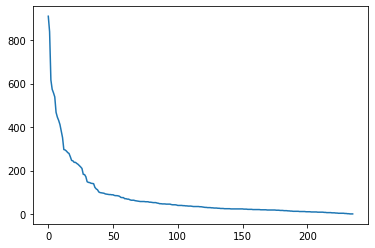

In [23]:
import matplotlib.pyplot as plt

freq = [x[1] for x in label_sort]

plt.plot(freq)